In [1]:
from matplotlib import pylab as P
import torch
import os
import numpy as np

In [2]:
print(torch.cuda.is_available())
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

False
PyTorch version: 2.0.0+cpu
**********
_CUDA version: 
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_19:00:59_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0
**********
CUDNN version: None
Available GPU devices: 0


AssertionError: Torch not compiled with CUDA enabled

<Axes: >

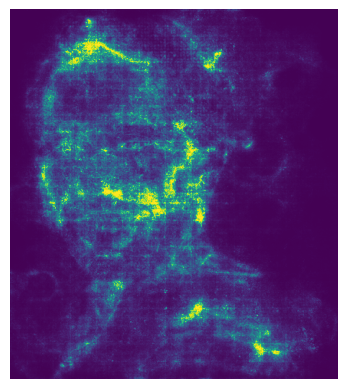

In [7]:
def ShowImage(im, title='', ax=None):
    if ax is None:
        fig, ax = P.subplots()
    if isinstance(im, Image.Image):  # check if image is PIL image
        im = np.asarray(im)
    ax.imshow(im.squeeze())
    ax.set_title(title)
    ax.axis('off')
    return ax

smoothgrad_folder = 'pathvision/test/numpys/smoothgrad/'
smoothgrad_disk = []
for filename in os.listdir(smoothgrad_folder):
    if filename.endswith('.csv'):
        smoothgrad_arr = np.loadtxt(os.path.join(smoothgrad_folder, filename), delimiter=',')
        smoothgrad_disk.append(smoothgrad_arr)

ShowImage(smoothgrad_disk[0])

In [5]:
from PIL import Image
import pathvision.core as pathvision

frames = []
frames.append(Image.open("pathvision/test/frame2.jpg"))
# frames.append(Image.open("pathvision/test/frame.png"))
od = pathvision.ObjectDetection()
image = od.ProcessFrames(frames=frames, labels="COCO", gradient_technique="Vanilla Gradients",
                                         trajectory_technique="Kalman Filter", segmentation_technique="Panoptic Deeplab",
                                         pre_trained_model="fasterrcnn_resnet50_fpn", model=None, threshold=None, LoadFromDisk=True, logger=True)

loading annotations into memory...
Done (t=0.98s)
creating index...
index created!


AssertionError: Torch not compiled with CUDA enabled